In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
from src.load_images import set_database, load_image
from src.show_images import show_img, show_imgs
from src.image_math import image_histogram
from src.image_transformations import shrink_image

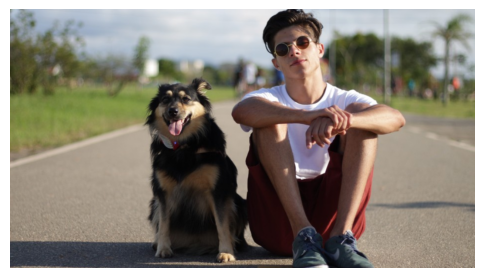

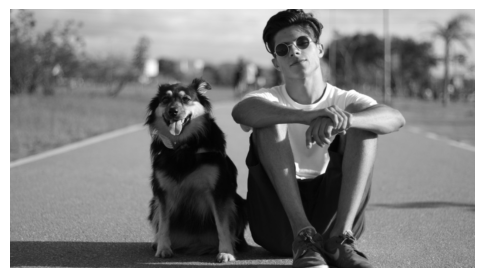

In [3]:
set_database("custom")

colored_img, gray_img = load_image("image.jpg")
colored_img = shrink_image(colored_img, 600)
gray_img = shrink_image(gray_img, 600)

show_img(colored_img)
show_img(gray_img)